# Load Data

In [1]:
import pandas as pd

### FOMC Rates

In [2]:
rates = pd.read_csv('inputs/FOMC_rates.csv')

In [3]:
rates

,﻿Date,Increase,Decrease,Tgt_level
0,12/17/15,25,0,0.25-0.50
1,12/15/16,25,0,0.50-0.75
2,3/16/17,25,0,0.75-1.00
3,6/15/17,25,0,1.00-1.25
4,12/14/17,25,0,1.25-1.50
5,3/22/18,25,0,1.50-1.75
6,6/14/18,25,0,1.75-2.00
7,9/27/18,25,0,2.00-2.25
8,12/20/18,25,0,2.25-2.50
9,8/1/19,0,25,2.00-2.25


Source: https://www.federalreserve.gov/monetarypolicy/openmarket.htm

### Index Returns

In [4]:
sp500_ret = pd.read_csv('inputs/SP500_ret.csv')

In [5]:
sp500_ret

,Effective_date,S&P_500
0,1/2/15,2058.20
1,1/5/15,2020.58
2,1/6/15,2002.61
3,1/7/15,2025.90
4,1/8/15,2062.14
...,...,...
2087,4/19/23,4154.52
2088,4/20/23,4129.79
2089,4/21/23,4133.52
2090,4/24/23,4137.04


Source: https://www.spglobal.com/spdji/en/indices/equity/sp-500/#overview

### Stock Trading Volume

In [6]:
stock_tv = pd.read_csv('inputs/SP500_TV.csv')

In [7]:
stock_tv['Date']

0      12/2/15
1      12/3/15
2      12/4/15
3      12/7/15
4      12/8/15
        ...   
502    3/31/23
503     4/3/23
504     4/4/23
505     4/5/23
506     4/6/23
Name: Date, Length: 507, dtype: object

Source: https://ycharts.com/indicators/cboe_spx_volume

### VBLAX data

In [8]:
#pip install yfinance
import yfinance as yf
import pandas as pd
from datetime import datetime

In [9]:
start  = datetime(2015, 1, 1)
end    = datetime(2023, 4, 25)

In [10]:
stock_prices = yf.download('VBLAX', start=start, end=end)

daily_returns = stock_prices['Adj Close'].pct_change()
daily_price = stock_prices['Adj Close']
daily_returns['Volume'] = stock_prices['Volume']

Vblax = pd.DataFrame({'Daily Returns': daily_returns, 'Daily Price': daily_price, 'Trading Volume': stock_prices['Volume']})

[*********************100%***********************]  1 of 1 completed


In [11]:
Vblax

,Daily Returns,Daily Price,Trading Volume
Date,,,
2019-02-07 00:00:00,NaN,11.382690,0.0
2019-02-08 00:00:00,0.002226,11.408027,0.0
2019-02-11 00:00:00,-0.002221,11.382690,0.0
2019-02-12 00:00:00,-0.002225,11.357359,0.0
2019-02-13 00:00:00,-0.002231,11.332026,0.0
...,...,...,...
2023-04-19 00:00:00,-0.00175,11.410000,0.0
2023-04-20 00:00:00,0.005259,11.470000,0.0
2023-04-21 00:00:00,-0.003487,11.430000,0.0


In [12]:
Vblax['date'] = pd.to_datetime(Vblax['Date'], errors ='coerce').dt.strftime('%m/%d/%y')
Vblax.dropna(subset=['date'], inplace=True)
Vblax

KeyError: 'Date'

In [13]:
for index, row in tqdm(Vblax.iterrows()):
    try:
        filing_index = sp_returns.loc[(rates['Date'] == row['date'])].index[0]
        returns = sp_returns.loc[filing_index:filing_index+2, 'ret']
        returns = returns +1 
        returns = returns.cumprod()
        returns = returns.to_list()
        cumret = returns[2]
        cumret = cumret -1
        sp500.loc[index, 'T-T2'] = cumret
    except IndexError:
        pass
   

NameError: name 'tqdm' is not defined

### VBIRX data

In [14]:
stock_prices2 = yf.download('VBIRX', start=start, end=end)

daily_returns2 = stock_prices2['Adj Close'].pct_change()
daily_price2 = stock_prices2['Adj Close']
daily_returns2['Volume'] = stock_prices2['Volume']

Vbirx = pd.DataFrame({'Daily Returns': daily_returns2, 'Daily Price': daily_price2, 'Trading Volume': stock_prices2['Volume']})
Vbirx

[*********************100%***********************]  1 of 1 completed


,Daily Returns,Daily Price,Trading Volume
Date,,,
2015-01-02 00:00:00,NaN,9.148488,0.0
2015-01-05 00:00:00,0.000953,9.157207,0.0
2015-01-06 00:00:00,0.000952,9.165925,0.0
2015-01-07 00:00:00,0.000952,9.174647,0.0
2015-01-08 00:00:00,-0.000951,9.165925,0.0
...,...,...,...
2023-04-19 00:00:00,-0.001001,9.980000,0.0
2023-04-20 00:00:00,0.002004,10.000000,0.0
2023-04-21 00:00:00,0.0,10.000000,0.0


# Cleaning and EDA

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

### FOMC Rates

In [17]:
rates.describe().T.style.format('{:,.2f}')

,count,mean,std,min,25%,50%,75%,max
Increase,23.00,30.43,24.95,0.00,25.00,25.00,37.50,75.00
Decrease,23.00,9.78,23.52,0.00,0.00,0.00,0.00,100.00


In [18]:
# Missing values
(
    ( # these lines do the calculation - what % of missing values are there for each var
        rates.isna()      
       .sum(axis=0)     
        /len(rates)       # convert # missing to % missing 
        *100            # report as percentage
    ) 
    .sort_values(ascending=False)
    .to_frame(name='% missing') 
    .style.format("{:.1f}")     
)

,% missing
﻿Date,0.0
Increase,0.0
Decrease,0.0
Tgt_level,0.0


In [19]:
# Convert to numeric
rates['Increase'] = pd.to_numeric(rates['Increase'])
rates['Decrease'] = pd.to_numeric(rates['Decrease'])

In [20]:
# Making units consistent
rates['Tgt_level'] = rates['Tgt_level'].apply(lambda x: x.replace('-', '.', 1))

In [21]:
# Outliers
rates.describe(percentiles=[.01,.05,.95,.99]).T.style.format('{:,.2f}')
print("Yes, there are variables with large outliers. In the Increase column, the maximum value is 75.00, which is the 99th percentile. In the Decrease column, the maximum value is 100.00, which is also an outlier. It may be necessary to winsorize or drop those observations to prevent them from skewing the results.")

Yes, there are variables with large outliers. In the Increase column, the maximum value is 75.00, which is the 99th percentile. In the Decrease column, the maximum value is 100.00, which is also an outlier. It may be necessary to winsorize or drop those observations to prevent them from skewing the results.


In [22]:
#Exploring dataset 
print(rates.dtypes)

﻿Date        object
Increase      int64
Decrease      int64
Tgt_level    object
dtype: object


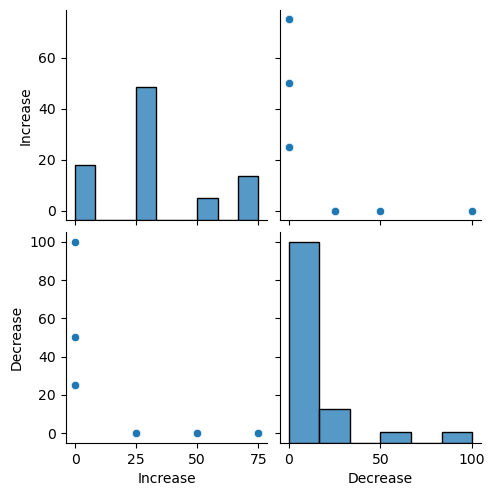

In [23]:
sns.pairplot(rates)
plt.show()

### Index Returns

In [24]:
sp500_ret.describe().T.style.format('{:,.2f}')

,count,mean,std,min,25%,50%,75%,max
S&P_500,"2,092.00","3,020.61",821.31,"1,829.08","2,280.89","2,823.48","3,810.17","4,796.56"


In [25]:
# Missing values
(
    ( # these lines do the calculation - what % of missing values are there for each var
        sp500_ret.isna()      
       .sum(axis=0)     
        /len(sp500_ret)       # convert # missing to % missing 
        *100            # report as percentage
    ) 
    .sort_values(ascending=False)
    .to_frame(name='% missing') 
    .style.format("{:.1f}")     
)

,% missing
Effective_date,0.0
S&P_500,0.0


In [26]:
#Exploring dataset 
print(sp500_ret.dtypes)

Effective_date      object
S&P_500            float64
dtype: object


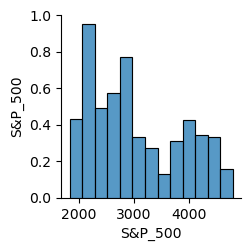

In [27]:
sns.pairplot(sp500_ret)
plt.show()

### Stock Trading Volume

In [ ]:
#stock_tv.describe().T.style.format('{:,.2f}')

In [28]:
# Missing values
(
    ( # these lines do the calculation - what % of missing values are there for each var
        stock_tv.isna()      
       .sum(axis=0)     
        /len(stock_tv)       # convert # missing to % missing 
        *100            # report as percentage
    ) 
    .sort_values(ascending=False)
    .to_frame(name='% missing') 
    .style.format("{:.1f}")     
)

,% missing
Date,0.0
Value,0.0


In [29]:
#Exploring dataset 
print(stock_tv.dtypes)

Date     object
Value    object
dtype: object


In [31]:
#sns.pairplot(stock_tv)
#plt.show()

### Clean VBLAX data

In [32]:
Vblax.describe().T.style.format('{:,.2f}')

,count,mean,std,min,25%,50%,75%,max
Daily Price,"1,060.00",13.40,1.51,9.93,11.86,13.65,14.83,15.84
Trading Volume,"1,060.00",0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [33]:
# Missing values
(
    ( # these lines do the calculation - what % of missing values are there for each var
        Vblax.isna()      
       .sum(axis=0)     
        /len(Vblax)       # convert # missing to % missing 
        *100            # report as percentage
    ) 
    .sort_values(ascending=False)
    .to_frame(name='% missing') 
    .style.format("{:.1f}")     
)

,% missing
Daily Returns,0.1
Daily Price,0.1
Trading Volume,0.1


In [34]:
#Exploring dataset 
print(Vblax.dtypes)

Daily Returns      object
Daily Price       float64
Trading Volume    float64
dtype: object


### Clean VBIRX data

In [35]:
Vbirx.describe().T.style.format('{:,.2f}')

,count,mean,std,min,25%,50%,75%,max
Daily Price,"2,091.00",9.78,0.45,9.15,9.40,9.65,10.14,10.55
Trading Volume,"2,091.00",0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [36]:
# Missing values
(
    ( # these lines do the calculation - what % of missing values are there for each var
        Vbirx.isna()      
       .sum(axis=0)     
        /len(Vbirx)       # convert # missing to % missing 
        *100            # report as percentage
    ) 
    .sort_values(ascending=False)
    .to_frame(name='% missing') 
    .style.format("{:.1f}")     
)

,% missing
Daily Returns,0.0
Daily Price,0.0
Trading Volume,0.0


In [37]:
#Exploring dataset 
print(Vbirx.dtypes)

Daily Returns      object
Daily Price       float64
Trading Volume    float64
dtype: object
